## Data Wrangling
Technique used to convert raw data into reports and dashboards.

## Case_Study ODI

### Step 1 - Import libraries


In [28]:
#1. Import libraries

import numpy as np
import pandas as pd

### Step 2 - Read the data

In [35]:
# 2. Read the data

df = pd.read_csv('ODI_Analytics.csv')
df.head()

,Country,Player,Runs,ScoreRate,MatchDate,Ground,Versus,URL
0,Afghanistan,Mohammad Shahzad,118.0,97.52,2-16-2010,Sharjah CA Stadium,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3087
1,Afghanistan,Mohammad Shahzad,110.0,99.09,09-01-2009,VRA Ground,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3008
2,Afghanistan,Mohammad Shahzad,100.0,138.88,8-16-2010,Cambusdoon New Ground,Scotland,../Matches/MatchScorecard_ODI.asp?MatchCode=3164
3,Afghanistan,Mohammad Shahzad,82.0,75.92,07-10-2010,Hazelaarweg,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3153
4,Afghanistan,Mohammad Shahzad,57.0,100.00,07-01-2010,Sportpark Westvliet,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3135


### Step 3 - Check Shape of data

In [36]:
# 3. Shape of the Data

df.shape

(55932, 8)

### Step 4 - Domain/Data Understanding

In [37]:
# 4. Domain/Data Understanding
df.head()

,Country,Player,Runs,ScoreRate,MatchDate,Ground,Versus,URL
0,Afghanistan,Mohammad Shahzad,118.0,97.52,2-16-2010,Sharjah CA Stadium,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3087
1,Afghanistan,Mohammad Shahzad,110.0,99.09,09-01-2009,VRA Ground,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3008
2,Afghanistan,Mohammad Shahzad,100.0,138.88,8-16-2010,Cambusdoon New Ground,Scotland,../Matches/MatchScorecard_ODI.asp?MatchCode=3164
3,Afghanistan,Mohammad Shahzad,82.0,75.92,07-10-2010,Hazelaarweg,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3153
4,Afghanistan,Mohammad Shahzad,57.0,100.00,07-01-2010,Sportpark Westvliet,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3135


### Step 5 - Basic info about the datasets

In [38]:
# 5. Basic information about the datasets

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    55932 non-null  object 
 1   Player     55932 non-null  object 
 2   Runs       55851 non-null  float64
 3   ScoreRate  55906 non-null  float64
 4   MatchDate  55932 non-null  object 
 5   Ground     55894 non-null  object 
 6   Versus     55932 non-null  object 
 7   URL        55932 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.4+ MB


### Step 6 - Summary statistics about the data - numerical and categorical data

In [39]:
# 6. Expalin the summary statistics about the data - numerical and categorical data

df.describe()

,Runs,ScoreRate
count,55851.000000,55906.000000
mean,22.230793,65.315887
std,25.544810,44.211558
min,0.000000,0.000000
25%,4.000000,37.500000
50%,13.000000,62.680000
75%,32.000000,87.500000
max,200.000000,600.000000


In [40]:
df.describe(include='object')

,Country,Player,MatchDate,Ground,Versus,URL
count,55932,55932,55932,55894,55932,55932
unique,22,1936,2757,178,25,3209
top,India,Sachin R Tendulkar,02-04-2007,Sharjah CA Stadium,Australia,../Matches/MatchScorecard_ODI.asp?MatchCode=3310
freq,6634,442,108,3577,7216,23


### Step 7 - Extract multiple columns from existing columns
#### e.g from Date -day, month, year, weekend, Quarter

In [127]:
# 7. extract multiple columns from existing columns - day, month, year, weekend, Quarter

df1=df
df1.head()

,Country,Player,Runs,ScoreRate,MatchDate,Ground,Versus,URL,day,month,year,quarter,weekend,Century,Duckouts,Nervous90,Fifty
0,Afghanistan,Mohammad Shahzad,118.0,97.52,2010-02-16,Sharjah CA Stadium,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3087,16,2,4,1,False,1,0,0,0
1,Afghanistan,Mohammad Shahzad,110.0,99.09,2009-09-01,VRA Ground,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3008,1,9,4,3,False,1,0,0,0
2,Afghanistan,Mohammad Shahzad,100.0,138.88,2010-08-16,Cambusdoon New Ground,Scotland,../Matches/MatchScorecard_ODI.asp?MatchCode=3164,16,8,4,3,False,1,0,0,0
3,Afghanistan,Mohammad Shahzad,82.0,75.92,2010-07-10,Hazelaarweg,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3153,10,7,4,3,True,0,0,0,1
4,Afghanistan,Mohammad Shahzad,57.0,100.00,2010-07-01,Sportpark Westvliet,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3135,1,7,4,3,False,0,0,0,1


In [128]:
# First change MatchDate to datetime dtype

df1['MatchDate'] = pd.to_datetime(df1['MatchDate'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Country    55932 non-null  object        
 1   Player     55932 non-null  object        
 2   Runs       55932 non-null  float64       
 3   ScoreRate  55932 non-null  float64       
 4   MatchDate  55932 non-null  datetime64[ns]
 5   Ground     55932 non-null  object        
 6   Versus     55932 non-null  object        
 7   URL        55932 non-null  object        
 8   day        55932 non-null  int64         
 9   month      55932 non-null  int64         
 10  year       55932 non-null  int64         
 11  quarter    55932 non-null  int64         
 12  weekend    55932 non-null  bool          
 13  Century    55932 non-null  int64         
 14  Duckouts   55932 non-null  int64         
 15  Nervous90  55932 non-null  int64         
 16  Fifty      55932 non-null  int64        

In [129]:
# Now extract different columns from Date column using dt function

df1['day'] = df1['MatchDate'].dt.day
df1['month'] = df1['MatchDate'].dt.month
df1['year'] = df1['MatchDate'].dt.year
df1['quarter'] = df1['MatchDate'].dt.quarter
df1['weekend'] = df1['MatchDate'].dt.day_name().isin(['Saturday','Sunday'])

In [130]:
df1.head()

,Country,Player,Runs,ScoreRate,MatchDate,Ground,Versus,URL,day,month,year,quarter,weekend,Century,Duckouts,Nervous90,Fifty
0,Afghanistan,Mohammad Shahzad,118.0,97.52,2010-02-16,Sharjah CA Stadium,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3087,16,2,2010,1,False,1,0,0,0
1,Afghanistan,Mohammad Shahzad,110.0,99.09,2009-09-01,VRA Ground,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3008,1,9,2009,3,False,1,0,0,0
2,Afghanistan,Mohammad Shahzad,100.0,138.88,2010-08-16,Cambusdoon New Ground,Scotland,../Matches/MatchScorecard_ODI.asp?MatchCode=3164,16,8,2010,3,False,1,0,0,0
3,Afghanistan,Mohammad Shahzad,82.0,75.92,2010-07-10,Hazelaarweg,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3153,10,7,2010,3,True,0,0,0,1
4,Afghanistan,Mohammad Shahzad,57.0,100.00,2010-07-01,Sportpark Westvliet,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3135,1,7,2010,3,False,0,0,0,1


### Step 8 - Create year bins with the below mentioned labels using np.digitize
Replace the defualt labels with the below mentioned lables<br>
labels={0:'1970-1989',1:'1990-1999',2:'2000-2009', 3:'2009 onwards'}

Rules for np.digitize -

1. Lower limit is included
2. Upper limit is not included
3. For out of bin range vallues
- the lower value than minimum bin will be 0 and upper value beyong maximum bin will be maximum bin index.

In [133]:
# 8. create year bins with the below mentioned labesl using np.digitize

# Replace the default labels with the below mentioned lables
#labels={0:'1970-1989',1:'1990-1999',2:'2000-2009', 3:'2009 onwards'}

print(min(df1['year']))
print(max(df1['year']))

year_bins=[1970,1980,1990,2000] 
df1['year_bin'] = np.digitize(df1['year'],bins=year_bins)


# 1970-1979 = 1 -- & but any value below 1970 will be 0
# 1980-1989 = 2
# 1990-1999 = 3
# 2000-2009 = 4 -- 2009 & above will also be upper limit (max bin number)

print(min(df1['year_bin']))
print(max(df1['year_bin']))


1971
2011
1
4


### Step 9 - Feature Engineering
Feature engineering based on Domain Knowledge.<br>
These new features will be Century, Fifty, Duckouts, Nervous90s based on runs scored column.

In [134]:
# 9. Make new columns for below conditions-
#Runs- Century, Fifty, Duckouts, Missed Century,type_of_run 

# If runs => >=100 then Century marked as 1 else 0
# If runs => >=50 and <=99, then Fifty marked as 1 else 0
# If runs => 0 then Duckouts marked as 1 else 0
# If runs => >=95 and <100 then Nervous90s marked as 1 else 0

df1['Century']=df1['Runs'].apply(lambda run: 1 if run>=100 else 0)
df1['Fifty']=df1['Runs'].apply(lambda run: 1 if run>=50 and run<=99 else 0)
df1['Duckouts']=df1['Runs'].apply(lambda run: 1 if run==0 else 0)
df1['Nervous90']=df1['Runs'].apply(lambda run: 1 if run>=95 and  run<100 else 0)

df1.head()

,Country,Player,Runs,ScoreRate,MatchDate,Ground,Versus,URL,day,month,year,quarter,weekend,Century,Duckouts,Nervous90,Fifty,year_bin
0,Afghanistan,Mohammad Shahzad,118.0,97.52,2010-02-16,Sharjah CA Stadium,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3087,16,2,2010,1,False,1,0,0,0,4
1,Afghanistan,Mohammad Shahzad,110.0,99.09,2009-09-01,VRA Ground,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3008,1,9,2009,3,False,1,0,0,0,4
2,Afghanistan,Mohammad Shahzad,100.0,138.88,2010-08-16,Cambusdoon New Ground,Scotland,../Matches/MatchScorecard_ODI.asp?MatchCode=3164,16,8,2010,3,False,1,0,0,0,4
3,Afghanistan,Mohammad Shahzad,82.0,75.92,2010-07-10,Hazelaarweg,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3153,10,7,2010,3,True,0,0,0,1,4
4,Afghanistan,Mohammad Shahzad,57.0,100.00,2010-07-01,Sportpark Westvliet,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3135,1,7,2010,3,False,0,0,0,1,4


### Step 10 - Identify & Treat the missing values using relevant techniques

In [111]:
#10. Identify & Treat the missing values using relevant techniques

# Identify missing values

df1.isnull().sum()


Country       0
Player        0
Runs         81
ScoreRate    26
MatchDate     0
Ground       38
Versus        0
URL           0
day           0
month         0
year          0
quarter       0
weekend       0
Century       0
Duckouts      0
Nervous90     0
Fifty         0
dtype: int64

In [124]:
# Runs, ScoreRate, Ground are columns having missing values.
# Runs and Scorerate can be substituted with mean while Ground by mode.

df1['Runs'] = df1['Runs'].fillna(df1['Runs'].mean())
df1['ScoreRate'] = df1['ScoreRate'].fillna(df1['ScoreRate'].mean())

df1['Ground'] = df1['Ground'].fillna(df1['Ground'].mode()[0])


In [126]:
# Check if missing values have been substituted

df1.isnull().sum()

Country      0
Player       0
Runs         0
ScoreRate    0
MatchDate    0
Ground       0
Versus       0
URL          0
day          0
month        0
year         0
quarter      0
weekend      0
Century      0
Duckouts     0
Nervous90    0
Fifty        0
dtype: int64

### Step 11 - Check if any duplicates present, if yes, remove them.

In [205]:
# 11. check whether any duplicates pressent on this dataset, if yes remove them

print('Duplicate value present-',df1.duplicated().any(),'\n')

print(df1.duplicated())

print('\nNumber of duplicate rows-',df1.duplicated().sum())

#print('Duplicated rows are-\n',df1[df1.duplicated()])

Duplicate value present- False 

0        False
1        False
2        False
3        False
4        False
         ...  
55921    False
55922    False
55923    False
55924    False
55925    False
Length: 55920, dtype: bool

Number of duplicate rows- 0


In [146]:
# Remove duplicate rows

df1.drop_duplicates(keep=False, inplace=True)  # keep=False removes all, no occurence kept
print(len(df1))                                # 55932, 6 were duplicate, now 55920 as keep=False

55920


### Step 12 - Extract information from dataset for players based on conditions

In [148]:
# 12. From the dataset, extract below information-

# 1.Display the best 5 players  with maximum number century
# 2.Display the  best 5 players with maximum number Fifty
# 3.Display the 5  players with maximum Duckout
# 4.Display the 5 players with maximum Nervous 90

df1.head()


,Country,Player,Runs,ScoreRate,MatchDate,Ground,Versus,URL,day,month,year,quarter,weekend,Century,Duckouts,Nervous90,Fifty,year_bin
0,Afghanistan,Mohammad Shahzad,118.0,97.52,2010-02-16,Sharjah CA Stadium,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3087,16,2,2010,1,False,1,0,0,0,4
1,Afghanistan,Mohammad Shahzad,110.0,99.09,2009-09-01,VRA Ground,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3008,1,9,2009,3,False,1,0,0,0,4
2,Afghanistan,Mohammad Shahzad,100.0,138.88,2010-08-16,Cambusdoon New Ground,Scotland,../Matches/MatchScorecard_ODI.asp?MatchCode=3164,16,8,2010,3,False,1,0,0,0,4
3,Afghanistan,Mohammad Shahzad,82.0,75.92,2010-07-10,Hazelaarweg,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3153,10,7,2010,3,True,0,0,0,1,4
4,Afghanistan,Mohammad Shahzad,57.0,100.00,2010-07-01,Sportpark Westvliet,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3135,1,7,2010,3,False,0,0,0,1,4


**Display the best 5 players  with maximum number of century**

In [223]:
# Method 1

p_cen = df1.groupby('Player')['Century'].sum()
p_cen1 = p_cen.sort_values(ascending=False)
p_cen2 = p_cen1[0:5]
print(p_cen2)

# Since o/p is series with index=Players & values=sum of century which was given in groupby() 
# hence it sorts by values. (So there is no 'by' in this method)


Player
Sachin R Tendulkar     48
Ricky T Ponting        30
Sanath T Jayasuriya    28
Sourav C Ganguly       22
Herschelle H Gibbs     21
Name: Century, dtype: int64


In [197]:
# Method 2 
# If u want df returned instead of series then use reset_index(). Also then u can specify
# 'by' clause in sort_values now.

p_cen = df1.groupby('Player')['Century'].sum().reset_index()
p_cen.sort_values(by='Century', ascending=False, inplace=True)
p_cen.head()


,Player,Century
1560,Sachin R Tendulkar,48
1465,Ricky T Ponting,30
1595,Sanath T Jayasuriya,28
1695,Sourav C Ganguly,22
704,Herschelle H Gibbs,21


In [191]:
# Method 3 (in class)

grp= df1.groupby('Player').agg({'Century':'sum'})
z=grp.sort_values(by=['Century'],ascending=False)
z.head()

,Century
Player,
Sachin R Tendulkar,48
Ricky T Ponting,30
Sanath T Jayasuriya,28
Sourav C Ganguly,22
Herschelle H Gibbs,21


**Display the  best 5 players with maximum number of Fifty**


In [200]:
p_fifty = df1.groupby('Player')['Fifty'].sum().reset_index()
p_fifty.sort_values(by='Fifty',ascending=False,inplace=True)
p_fifty.head()

,Player,Fifty
1560,Sachin R Tendulkar,95
769,Jacques H Kallis,84
751,Inzamam-ul-Haq,83
1395,Rahul Dravid,83
1465,Ricky T Ponting,82


**Display the 5  players with maximum number of Duckouts**

In [203]:
p_dk = df1.groupby('Player')['Duckouts'].sum().reset_index()
p_dk.sort_values(by='Duckouts', ascending=False, inplace=True)
p_dk.head()

,Player,Duckouts
1216,Muttiah Muralitharan,41
1595,Sanath T Jayasuriya,34
1882,Wasim Akram,32
613,Glenn D McGrath,32
1871,W P U J Chaminda Vaas,30


**Display the 5 players with maximum Nervous 90**

In [204]:
p_n90 = df1.groupby('Player')['Nervous90'].sum().reset_index()
p_n90.sort_values(by='Nervous90', ascending=False,inplace=True)
p_n90.head()

,Player,Nervous90
1560,Sachin R Tendulkar,9
1375,Pinnaduwage A de Silva,6
1595,Sanath T Jayasuriya,6
1241,Nathan J Astle,4
769,Jacques H Kallis,4


### Step 13 - Extract information from dataset for players based on conditions - for only 1 country - India

In [19]:
# 13. For country India, extract below information-

# 1.Display the best 5 players  with maximum century
# 2.Display the  best 5 players with maximum Fifty
# 3.Display the 5  players with maximum Duckout
# 4.Display the 5 players with maximum Nervous 90

**For Country India, Display the best 5 players  with maximum century, fifty, duckout, nervous90**

In [231]:
# Method 1

p_cen = df1.groupby(['Country','Player'])['Century'].sum().reset_index()
p_cen.sort_values(by='Century', ascending=False, inplace=True)
print(type(p_cen))

p_cen[p_cen['Country']=='India'].head()


<class 'pandas.core.frame.DataFrame'>


,Country,Player,Century
789,India,Sachin R Tendulkar,48
807,India,Sourav C Ganguly,22
838,India,Virender Sehwag,14
847,India,Yuvraj Singh,13
771,India,Rahul Dravid,12


In [262]:
# Method 2

# First subset df for only India

df2 = df1[df1['Country'] == 'India']
df2

# Now apply same set of operations to get top 5 players with max century, fifty, duckout,
# nervou90

p_cen1 = df2.groupby('Player')['Century'].sum().reset_index()
p_cen1.sort_values(by='Century', ascending=False, inplace=True)
print('\n',p_cen1.head())


p_fifty1 = df2.groupby('Player')['Fifty'].sum().reset_index()
p_fifty1.sort_values(by='Fifty',ascending=False,inplace=True)
print('\n',p_fifty1.head())


p_dk1 = df2.groupby('Player')['Duckouts'].sum().reset_index()
p_dk1.sort_values(by='Duckouts', ascending=False, inplace=True)
print('\n',p_dk1.head())


p_n90n = df2.groupby('Player')['Nervous90'].sum().reset_index()
p_n90n.sort_values(by='Nervous90', ascending=False,inplace=True)
print('\n',p_n90n.head())



                  Player  Century
125  Sachin R Tendulkar       48
143    Sourav C Ganguly       22
174     Virender Sehwag       14
183        Yuvraj Singh       13
107        Rahul Dravid       12

                   Player  Fifty
125   Sachin R Tendulkar     95
107         Rahul Dravid     83
143     Sourav C Ganguly     72
81   Mohammad Azharuddin     58
183         Yuvraj Singh     49

                  Player  Duckouts
63      Javagal Srinath        25
15         Anil  Kumble        23
125  Sachin R Tendulkar        20
184         Zaheer Khan        19
54      Harbhajan Singh        18

                  Player  Nervous90
125  Sachin R Tendulkar          9
143    Sourav C Ganguly          3
174     Virender Sehwag          3
183        Yuvraj Singh          2
75     Mahendra S Dhoni          2


## Step 14 - Use pivot table (alternative to groupby())

Normally used when you want to groupby on more than 1 column e.g. here on Player and Quarter

**For every player from India calculate the season-wise (season refer to quarter) 
total runs scored between 2006 and 2011 using Pivot table**

Since here u need to group by 2 things - Players and quarters, so for better display use
pivot table instead of groupby(). Pivot will take arguments such as-
- *index* - in rows u put players (on which u want groupby)
- *columns* - in columns u put quarters (on which u want groupby)
- *values* - in values u put runs (on which u want information retrieved on)
- *aggfunc* - sum


For every player and quarter/season wise -> grouping<br>
From India and b/w years 2006 & 2011 -> filtering<br>
Caculate total runs -> aggregate function-sum on values-runs

In [312]:
# 14. For every player from India calculate the season-wise (season refer to quarter) 
# total runs scored between 2006 and 2011
# Use pivot table

df2.head()
print('Number of Only India records',len(df2))


Number of Only India records 1512


In [314]:
# Method 1

# Filtered on year further, df2 was already filtered on Country
df2 = df2[(df2['year']>=2006) & (df2['year']<=2011)]
print('Number of Only India records & within year 2006 & 2011 =',len(df2))

print('min year', min(df2['year']))
print('max year',max(df2['year']))

out1=pd.pivot_table(df2, index='Player',columns='quarter', values='Runs', aggfunc='sum')
out1

Number of Only India records & within year 2006 & 2011 = 1512
min year 2006
max year 2011


quarter,1,2,3,4
Player,,,,
Abhimanyu Mithun,24.0,NaN,4.0,NaN
Abhishek M Nayar,NaN,NaN,0.0,NaN
Ajinkya M Rahane,NaN,NaN,158.0,182.0
Ajit B Agarkar,55.0,43.0,32.0,19.0
Amit Mishra,NaN,5.0,NaN,NaN
Anil Kumble,5.0,NaN,NaN,3.0
Ashish Nehra,31.0,0.0,9.0,14.0
Ashok B Dinda,NaN,18.0,NaN,NaN
Dinesh Mongia,NaN,34.0,63.0,60.0


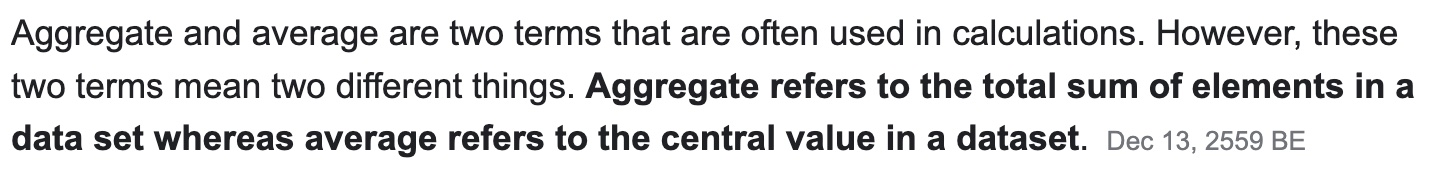

In [326]:
# Method 1 - cont.

# USe fill_value=0 to replace null values for quarters with no runs
# Use margins=True to get aggregation (sum) of values for per rows and per column
# per row refer to runs for each player
# per column refer to runs for each quarter (for all players)


out1=pd.pivot_table(df2, index='Player',columns='quarter', values='Runs', aggfunc='sum',
                   fill_value=0,margins=True)
print(len(out1))
out1.sort_values(by='All',axis=0,ascending=False)
out1

55


quarter,1,2,3,4,All
Player,,,,,
Abhimanyu Mithun,24,0,4,0,28.0
Abhishek M Nayar,0,0,0,0,0.0
Ajinkya M Rahane,0,0,158,182,340.0
Ajit B Agarkar,55,43,32,19,149.0
Amit Mishra,0,5,0,0,5.0
Anil Kumble,5,0,0,3,8.0
Ashish Nehra,31,0,9,14,54.0
Ashok B Dinda,0,18,0,0,18.0
Dinesh Mongia,0,34,63,60,157.0


In [305]:
# Method 2 - in-class
# We make a new df from original df where conditions on country and year are true.


df_s = df[(df.year>=2006) & (df.year<=2020) & (df.Country=='India')]
df_s
print(len(df_s))

# Apply pivot on filtered dataset

df_sn = df_s.pivot_table(index='Player', values='Runs',columns= 'quarter',aggfunc=sum,
                 fill_value=0,margins=True)
df_sn

1512


quarter,1,2,3,4,All
Player,,,,,
Abhimanyu Mithun,24,0,4,0,28.0
Abhishek M Nayar,0,0,0,0,0.0
Ajinkya M Rahane,0,0,158,182,340.0
Ajit B Agarkar,55,43,32,19,149.0
Amit Mishra,0,5,0,0,5.0
Anil Kumble,5,0,0,3,8.0
Ashish Nehra,31,0,9,14,54.0
Ashok B Dinda,0,18,0,0,18.0
Dinesh Mongia,0,34,63,60,157.0


## Step 15 - Use Pivot table (when need to groupby multiple columns)

**For every player from India calculate the year-wise total centuries scored between 2006 and 2011**

For every player and year wise -> grouping<br>
From India and b/w years 2006 & 2011 -> filtering<br>
Caculate total centuries -> aggregate function-sum on values-centuries


In [468]:
# 15. For every player from India calculate the year-wise total centuries scored bewteen 2006 and 2011
# Use pivot table

df_sub = df1[(df1['Country'] == 'India') & (df1['year'] >= 2006) & (df1['year'] <= 2011)]
print(len(df_sub))

df_piv = df_sub.pivot_table(index='Player', columns='year',values='Century',aggfunc='sum',
                           fill_value=0,margins=True)
df_piv.sort_values(by = 'All',ascending=False, inplace=True)
df_piv



1512


year,2006,2007,2008,2009,2010,2011,All
Player,,,,,,,
All,5,5,10,13,12,8,53
Sachin R Tendulkar,2,1,1,3,1,2,10
Yuvraj Singh,2,1,2,2,0,1,8
Gautam Gambhir,0,1,3,2,2,0,8
Virender Sehwag,0,1,1,3,1,1,7
Virat Kohli,0,0,0,1,3,3,7
Mahendra S Dhoni,0,1,1,2,1,0,5
Suresh K Raina,0,0,2,0,1,0,3
Rohit G Sharma,0,0,0,0,2,0,2


## Step 16 - Using pandas df plot, stacked bar chart

**Display the Performance evaluation per player & per year in terms of centuries using stacked bar chart**

year                2006  2007  2008  2009  2010  2011
Player                                                
Sachin R Tendulkar     2     1     1     3     1     2
Yuvraj Singh           2     1     2     2     0     1
Gautam Gambhir         0     1     3     2     2     0
Virender Sehwag        0     1     1     3     1     1
Virat Kohli            0     0     0     1     3     3
Mahendra S Dhoni       0     1     1     2     1     0
Suresh K Raina         0     0     2     0     1     0
Rohit G Sharma         0     0     0     0     2     0
Yusuf K Pathan         0     0     0     0     1     1
Rahul Dravid           1     0     0     0     0     0
<class 'pandas.core.frame.DataFrame'>
Columns are Index([2006, 2007, 2008, 2009, 2010, 2011], dtype='object', name='year')


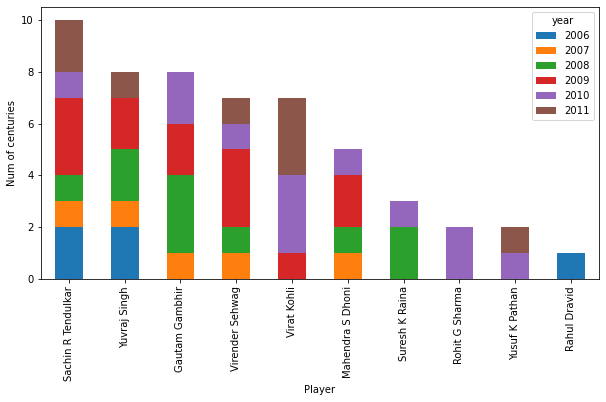

In [364]:
# 16. Display the Performance evaluation per player & per year in terms of centuries
# if we plot all players, chart will not be clear, so pick only first 10 players)

df_piv_s = df_piv[0:11]
df_piv_s = df_piv_s.drop('All',axis=0)
df_piv_s = df_piv_s.drop('All',axis=1)

print(df_piv_s)
print(type(df_piv_s))
print('Columns are',df_piv_s.columns)


# Plot stacked bar plot using pandas df plot

df_piv_s.plot(kind='bar', stacked=True, figsize=(10,5))
plt.ylabel('Num of centuries');



## Step 17 - Line Chart to show trend of centuries and missed centuries over the years

**Display the total century and missed century (means Nervous 90) in year wise**

Here word year wise is important, we can infer to make a plot of line chart since we want to view trend year wise.


In [416]:
# 17. Create a df for Sachin Tendulkar, 
# Display the total century and missed century (means Nervous 90) in year wise

len(df1)

55920

1. Plot using Matplotlib

This method is longer as you individually groupby century and then by nervous90 and then you combine in a single dataframe and use matplotlib with 2 plot functions with (x,y) and (x,y1).

In [427]:
# Method 1 Plotting using Matplotlib

# create df for Sachin
df_sachin = df1[df1['Player'] == 'Sachin R Tendulkar']
print(len(df_sachin))


# group by year and information on total century and missed century (sum)

df_sachin.head()


442


,Country,Player,Runs,ScoreRate,MatchDate,Ground,Versus,URL,day,month,year,quarter,weekend,Century,Duckouts,Nervous90,Fifty,year_bin
15150,India,Sachin R Tendulkar,200.0,136.05,2010-02-24,Captain Roop Singh Stadium,South Africa,../Matches/MatchScorecard_ODI.asp?MatchCode=3092,24,2,2010,1,False,1,0,0,0,4
15151,India,Sachin R Tendulkar,186.0,124.00,1999-11-08,Lal Bahadur Shastri Stadium,New Zealand,../Matches/MatchScorecard_ODI.asp?MatchCode=1610,8,11,1999,4,False,1,0,0,0,3
15152,India,Sachin R Tendulkar,175.0,124.11,2009-11-05,Rajiv Gandhi International Stadium,Australia,../Matches/MatchScorecard_ODI.asp?MatchCode=3050,5,11,2009,4,False,1,0,0,0,4
15153,India,Sachin R Tendulkar,163.0,122.55,2009-03-08,AMI Stadium,New Zealand,../Matches/MatchScorecard_ODI.asp?MatchCode=2945,8,3,2009,1,True,1,0,0,0,4
15154,India,Sachin R Tendulkar,152.0,100.66,2003-02-23,City Oval,Namibia,../Matches/MatchScorecard_ODI.asp?MatchCode=2052,23,2,2003,1,True,1,0,0,0,4


In [433]:
c = df_sachin.groupby('year')['Century'].sum().reset_index().rename(columns={'Century': 'total_century'})
print(type(c))
c

<class 'pandas.core.frame.DataFrame'>


,year,total_century
0,1989,0
1,1990,0
2,1991,0
3,1992,0
4,1993,0
5,1994,3
6,1995,1
7,1996,6
8,1997,2
9,1998,9


In [435]:
m = df_sachin.groupby('year')['Nervous90'].sum().reset_index()
m

,year,Nervous90
0,1989,0
1,1990,0
2,1991,0
3,1992,0
4,1993,0
5,1994,0
6,1995,0
7,1996,0
8,1997,0
9,1998,1


In [440]:
# Now add m[Nervous90] to c dataframe

c['missed century'] = m['Nervous90']
c

,year,total_century,missed century
0,1989,0,0
1,1990,0,0
2,1991,0,0
3,1992,0,0
4,1993,0,0
5,1994,3,0
6,1995,1,0
7,1996,6,0
8,1997,2,0
9,1998,9,1


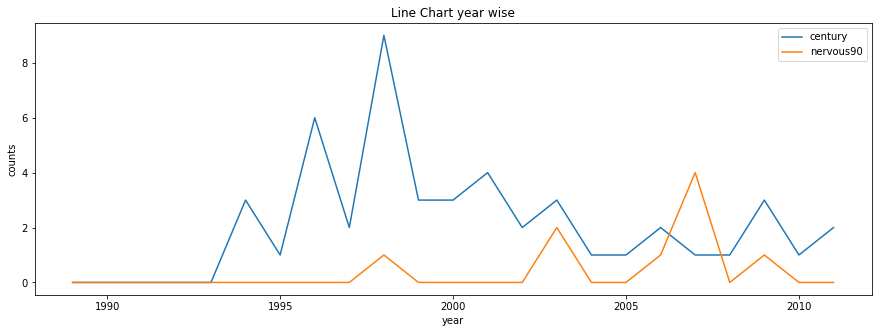

In [454]:
# Now make line plot using Matplotlib

import matplotlib.pyplot as plt

x = c['year']
y1 = c['total_century']
y2= c['missed century']


plt.figure(figsize=(15,5))
plt.plot(x,y1,label='century')
plt.plot(x,y2,label='nervous90')
plt.title('Line Chart year wise')
plt.xlabel('year')
plt.ylabel('counts')
plt.legend();

2. Plot using pandas inbuilt df plotting function plot()

This method much shorter code to plot (u select df with col's u want in groupby 
and col's u want to aggregate & at last add .plot function to plot line chart)

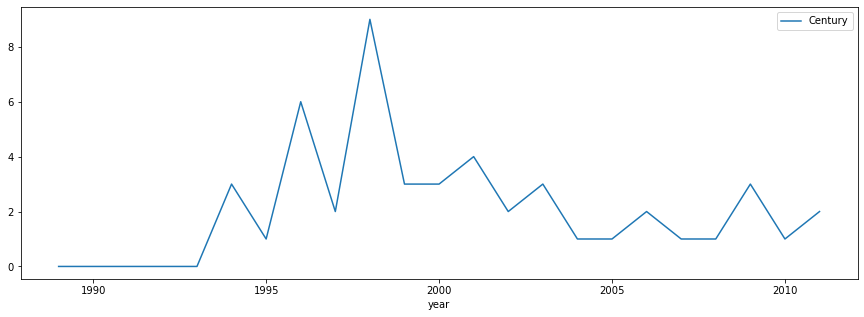

In [467]:
# Method 2 Plotting using pandas inbuilt df plotting function plot()


df_sachin[['year','Century']].groupby('year').sum().plot(figsize=(15,5));


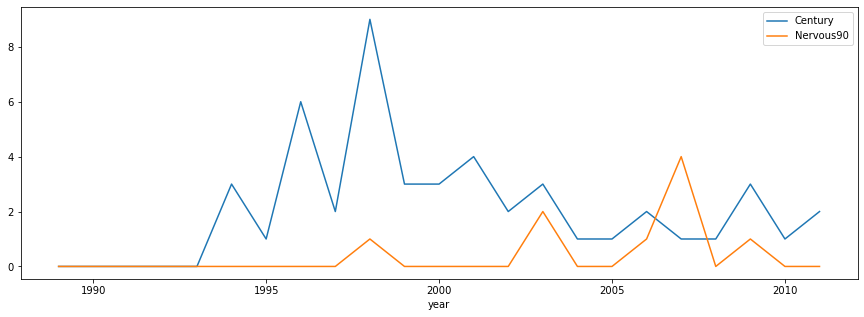

In [466]:
df_sachin[['year','Century','Nervous90']].groupby('year').sum().plot(figsize=(15,5));
